In [ ]:
# Install the ultralytics package from PyPI
!pip install ultralytics

In [69]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO("best.pt")  # or choose yolov8m/l-world.pt


In [77]:
# Execute prediction for specified categories on an image
results = model.predict('istockphoto-939061162-612x612.jpg', conf=0.45)

# Show results
results[0].show()


image 1/1 /Users/kuanyshbakytuly/Desktop/Project Conveyer/istockphoto-939061162-612x612.jpg: 448x640 70 potatos, 77.5ms
Speed: 4.2ms preprocess, 77.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


In [71]:
import cv2
import matplotlib.pyplot as plt


image 1/1 /Users/kuanyshbakytuly/Desktop/Project Conveyer/istockphoto-939061162-612x612.jpg: 448x640 70 potatos, 74.6ms
Speed: 10.2ms preprocess, 74.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


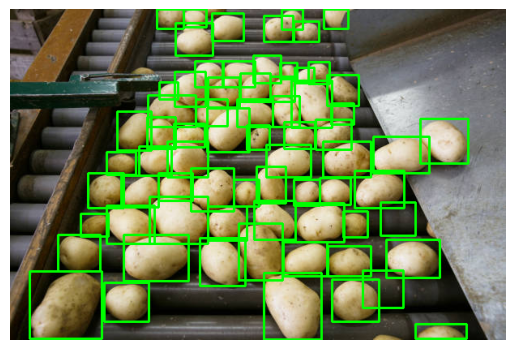

In [78]:
# Draw the boxes on the image
img_rgb = cv2.imread('istockphoto-939061162-612x612.jpg')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
results = model.predict('istockphoto-939061162-612x612.jpg', conf=0.45)
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0]  # Get box coordinates
    label = box.cls[0]  # Get class label (if available)
    conf = box.conf[0]  # Confidence score

    # Draw the bounding box on the image
    cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [24]:
!pwd

/Users/kuanyshbakytuly/Conveyer


In [1]:
def save(results, annot_filename):
    annotations = []
    for result in results:
        for box in result.boxes:
            x, y, w, h = box.xywhn[0]
            cls = 0
            annotation = f"{int(cls)} {x} {y} {w} {h}"
            annotations.append(annotation)

    # Save annotations to a file
    with open(annot_filename, "w") as f:
        for annotation in annotations:
            f.write(annotation + "\n")

In [2]:
frame_count = 15
frame_count % 5 == 0 and frame_count % 2 == 1

True

In [37]:
import os
import cv2
import torch

from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO("yolov8l-world.pt")  # or choose yolov8m/l-world.pt

# Define custom classes
model.set_classes(["potato"])

def proccess(video_path, i, conff):
    # Initialize video capture
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_count += 1
        if frame_count % 25 == 0:
            # Process frame with YOLO
            #results = model.predict(frame, verbose=False, conf=conff)

            # Save frame to images folder
            frame_filename = f'images/{i}_frame_{frame_count}.jpg'
            cv2.imwrite(frame_filename, frame)

            # Save annotations to annotations folder
            #annot_filename = f'Dataset/labels/{i}_frame_{frame_count}.txt'
            #save(results, annot_filename)

    cap.release()

In [38]:
import glob
videos = sorted(glob.glob('Videos/*'))
print(videos)

['Videos/Дизайн без названия (1) 2.mp4', 'Videos/Дизайн без названия (2) 2.mp4', 'Videos/Дизайн без названия (3) 2.mp4', 'Videos/Дизайн без названия.mp4', 'Videos/Дизайн без названия (1).mp4', 'Videos/Дизайн без названия (10).mp4', 'Videos/Дизайн без названия (11).mp4', 'Videos/Дизайн без названия (12).mp4', 'Videos/Дизайн без названия (13).mp4', 'Videos/Дизайн без названия (14).mp4', 'Videos/Дизайн без названия (15).mp4', 'Videos/Дизайн без названия (16).mp4', 'Videos/Дизайн без названия (17).mp4', 'Videos/Дизайн без названия (18).mp4', 'Videos/Дизайн без названия (2).mp4', 'Videos/Дизайн без названия (20).mp4', 'Videos/Дизайн без названия (21).mp4', 'Videos/Дизайн без названия (22).mp4', 'Videos/Дизайн без названия (23).mp4', 'Videos/Дизайн без названия (24).mp4', 'Videos/Дизайн без названия (25).mp4', 'Videos/Дизайн без названия (26).mp4', 'Videos/Дизайн без названия (27).mp4', 'Videos/Дизайн без названия (28).mp4', 'Videos/Дизайн без названия (29).mp4', 'Videos/Дизайн без назва

In [28]:
d = [i.split('/')[-1].split('_')[0] for i in img]
d

['30',
 '16',
 '1',
 '33',
 '8',
 '33',
 '11',
 '27',
 '12',
 '17',
 '21',
 '31',
 '15',
 '26',
 '26',
 '35',
 '9',
 '33',
 '23',
 '3',
 '5',
 '12',
 '34',
 '19',
 '11',
 '4',
 '22',
 '33',
 '17',
 '35',
 '34',
 '26',
 '13',
 '17',
 '0',
 '31',
 '1',
 '26',
 '25',
 '6',
 '9',
 '30',
 '31',
 '1',
 '33',
 '8',
 '34',
 '36',
 '27',
 '5',
 '12',
 '22',
 '35',
 '4',
 '13',
 '10',
 '1',
 '33',
 '23',
 '23',
 '5',
 '12',
 '17',
 '27',
 '24',
 '34',
 '26',
 '18',
 '5',
 '25',
 '2',
 '32',
 '14',
 '3',
 '35',
 '6',
 '11',
 '24',
 '32',
 '15',
 '2',
 '33',
 '7',
 '10',
 '36',
 '21',
 '29',
 '14',
 '24',
 '27',
 '6',
 '11',
 '18',
 '33',
 '13',
 '20',
 '20',
 '15',
 '24',
 '27',
 '15',
 '2',
 '33',
 '25',
 '16',
 '25',
 '32',
 '11',
 '14',
 '3',
 '22',
 '29',
 '12',
 '7',
 '29',
 '34',
 '6',
 '11',
 '18',
 '0',
 '20',
 '10',
 '25',
 '36',
 '14',
 '30',
 '21',
 '19',
 '34',
 '24',
 '27',
 '12',
 '5',
 '23',
 '23',
 '33',
 '1',
 '13',
 '4',
 '35',
 '22',
 '12',
 '5',
 '27',
 '36',
 '11',
 '34',
 '8

In [30]:
len(set(d))

36

In [29]:
set(d)

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9'}

In [26]:
img

['Dataset_30/images/30_frame_150.jpg',
 'Dataset_30/images/16_frame_100.jpg',
 'Dataset_30/images/1_frame_125.jpg',
 'Dataset_30/images/33_frame_425.jpg',
 'Dataset_30/images/8_frame_225.jpg',
 'Dataset_30/images/33_frame_800.jpg',
 'Dataset_30/images/11_frame_500.jpg',
 'Dataset_30/images/27_frame_150.jpg',
 'Dataset_30/images/12_frame_50.jpg',
 'Dataset_30/images/17_frame_250.jpg',
 'Dataset_30/images/21_frame_75.jpg',
 'Dataset_30/images/31_frame_200.jpg',
 'Dataset_30/images/15_frame_50.jpg',
 'Dataset_30/images/26_frame_200.jpg',
 'Dataset_30/images/26_frame_75.jpg',
 'Dataset_30/images/35_frame_375.jpg',
 'Dataset_30/images/9_frame_175.jpg',
 'Dataset_30/images/33_frame_550.jpg',
 'Dataset_30/images/23_frame_150.jpg',
 'Dataset_30/images/3_frame_75.jpg',
 'Dataset_30/images/5_frame_125.jpg',
 'Dataset_30/images/12_frame_100.jpg',
 'Dataset_30/images/34_frame_150.jpg',
 'Dataset_30/images/19_frame_25.jpg',
 'Dataset_30/images/11_frame_475.jpg',
 'Dataset_30/images/4_frame_75.jpg',

In [42]:
img = glob.glob('Dataset_30/images/*')
len(img)

485

In [43]:
old = [i.split('Dataset_30/images/') for i in img]

In [45]:
for i in new:
    if i not in old:
        print(i)

['', '28_frame_25.jpg']
['', '28_frame_100.jpg']
['', '28_frame_50.jpg']
['', '28_frame_175.jpg']
['', '28_frame_200.jpg']
['', '28_frame_225.jpg']
['', '28_frame_150.jpg']
['', '28_frame_75.jpg']
['', '28_frame_125.jpg']


In [44]:
new = [i.split('images/') for i in new]


In [ ]:
old_images = sorted(glob.glob('/Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/*'))
new_images = sorted(glob.glob('images/*'))

a = zip(old_images, new_images)
for i in a:
    print(i)

In [58]:
orig_new_images = [i.split('/')[-1] for i in new_images]

In [65]:
temp = old_images[0].split('/')[-1].split('.')[0].split('_jpg')[0]+'.jpg'
temp

'0_frame_100.jpg'

In [59]:
import shutil

In [62]:
orig_new_images

['0_frame_100.jpg',
 '0_frame_125.jpg',
 '0_frame_150.jpg',
 '0_frame_175.jpg',
 '0_frame_200.jpg',
 '0_frame_225.jpg',
 '0_frame_25.jpg',
 '0_frame_50.jpg',
 '0_frame_75.jpg',
 '10_frame_100.jpg',
 '10_frame_125.jpg',
 '10_frame_150.jpg',
 '10_frame_175.jpg',
 '10_frame_200.jpg',
 '10_frame_225.jpg',
 '10_frame_25.jpg',
 '10_frame_250.jpg',
 '10_frame_275.jpg',
 '10_frame_300.jpg',
 '10_frame_50.jpg',
 '10_frame_75.jpg',
 '11_frame_100.jpg',
 '11_frame_125.jpg',
 '11_frame_150.jpg',
 '11_frame_175.jpg',
 '11_frame_200.jpg',
 '11_frame_225.jpg',
 '11_frame_25.jpg',
 '11_frame_250.jpg',
 '11_frame_275.jpg',
 '11_frame_300.jpg',
 '11_frame_325.jpg',
 '11_frame_350.jpg',
 '11_frame_375.jpg',
 '11_frame_400.jpg',
 '11_frame_425.jpg',
 '11_frame_450.jpg',
 '11_frame_475.jpg',
 '11_frame_50.jpg',
 '11_frame_500.jpg',
 '11_frame_525.jpg',
 '11_frame_550.jpg',
 '11_frame_575.jpg',
 '11_frame_600.jpg',
 '11_frame_625.jpg',
 '11_frame_75.jpg',
 '12_frame_100.jpg',
 '12_frame_125.jpg',
 '12_frame

In [63]:
orig

'9_frame_50_jpg'

In [68]:
c = 0
for i in old_images:
    orig = i.split('/')[-1].split('.')[0].split('_jpg')[0]+'.jpg'
    dest_path = i
    if orig in orig_new_images:
        new_img = f'images/{orig}'
        shutil.copy(new_img, dest_path)

        print(f"Replaced {i} with {new_img}")
    c += 1


Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/0_frame_100_jpg.rf.50acee0bc6431564b7863bab55459639.jpg with images/0_frame_100.jpg
Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/0_frame_150_jpg.rf.7fd4a0329f4daeaec66d1e2dc9164a09.jpg with images/0_frame_150.jpg
Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/0_frame_225_jpg.rf.dee0905f142beb26dc758d2485950d21.jpg with images/0_frame_225.jpg
Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/0_frame_25_jpg.rf.1ad9aae964947aa143b49d8e80ad9b82.jpg with images/0_frame_25.jpg
Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/0_frame_50_jpg.rf.ae240b914e27cf31be134c0f837eee5b.jpg with images/0_frame_50.jpg
Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/10_frame_100_jpg.rf.898e9d9cb8093be315d68e7ba1caf82e.jpg with images/10_frame_100.jpg
Replaced /Users/kuanyshbakytuly/Desktop/Project Conveyer/train/images/10_frame

In [161]:
import cv2
import torch
from PIL import Image
from IPython.display import display, Image
# Assuming you have a pre-trained model and processor
# model = ...
# processor = ...

confs = 0.0001
ind = 37
video_capture = cv2.VideoCapture(videos[ind])

fps = video_capture.get(cv2.CAP_PROP_FPS)
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
output_video = cv2.VideoWriter(f"output_1_{confs}.mp4", fourcc, fps, (width, height))

counter = 0

text_labels = [["a potato",]]
while True:
  
  ret, frame = video_capture.read()
  counter += 1
  if not ret:
    break


    
  if counter % 25==0:
      # Execute prediction for specified categories on an image
      results = model.predict(frame, conf=confs)

      
        # Draw the boxes on the image
      for box in results[0].boxes:
          x1, y1, x2, y2 = box.xyxy[0]  # Get box coordinates
          label = box.cls[0]  # Get class label (if available)
          conf = box.conf[0]  # Confidence score

          # Draw the bounding box on the image
          cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
      # Save frame to 
      frame_filename = f'Dataset_30/images/{ind}_frame_{counter}.jpg'
      cv2.imwrite(frame_filename, frame)

      # Save annotations to annotations folder
      annot_filename = f'Dataset_30/labels/{ind}_frame_{counter}.txt'
      save(results, annot_filename)

      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
      plt.imshow(frame)
      plt.axis("off")
      plt.show()

# Release the video capture and writer objects
video_capture.release()
#output_video.release()

print("Video processing completed.")


IndexError: list index out of range

In [162]:
!pip install roboflow

  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 1.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached idna-3.7-py3-none-any.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 1.3 MB/s eta 0:00:0000:0100:02
  error: subprocess-exited-with-error
  
  × Building wheel for pillow-heif (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [92 lines of output]
      /private/var/folders/c_/60790hqd70x33scytjn54jlc0000gn/T/pip-build-env-yuncvzjw/overlay/lib/python3.11/site-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license ex

In [ ]:
!roboflow import -w testupload -p project-1-8zgld /path/to/dataset/folder